In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datos_robot_copy.csv')
df

,x,y,objeto_presente,lectura_ultrasonico,movimiento_direccion,movimiento_distancia,velocidad_lineal,velocidad_angular,aceleracion_lineal,aceleracion_angular,tiempo,energia_consumida,temperatura_ambiente,nivel_bateria
0,0,0,True,4.569460,3.552627,0.359970,0.109128,0.267437,0.662787,0.756931,0.677831,0.799119,0.586829,0.343832
1,0,0,True,1.597642,2.833858,0.404150,0.326446,0.206406,0.582788,0.420501,0.371480,0.395816,0.267526,0.713431
2,-1,0,True,1.665573,3.538024,1.829483,0.471089,0.844696,0.605845,0.324227,0.195206,0.625648,0.045026,0.023439
3,0,1,False,0.000000,1.072251,1.238213,0.191998,0.397940,0.587975,0.410030,0.259334,0.617912,0.786587,0.095844
4,0,1,False,0.000000,2.017098,0.188881,0.085789,0.610513,0.940749,0.779926,0.842558,0.374739,0.397378,0.538790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,False,0.000000,5.918917,1.755666,0.551503,0.872803,0.887497,0.379759,0.298491,0.260252,0.232290,0.562825
1996,0,0,False,0.000000,3.840182,0.932224,0.591008,0.501816,0.278671,0.837928,0.348665,0.894578,0.749898,0.818273
1997,1,1,True,0.000000,0.636452,1.698998,0.039278,0.698013,0.319730,0.881813,0.916598,0.908386,0.017987,0.269237
1998,0,2,True,0.000000,1.849816,1.326884,0.848985,0.270284,0.425276,0.319801,0.491212,0.318245,0.645993,0.969476


In [3]:
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 x                       0
y                       0
objeto_presente         0
lectura_ultrasonico     0
movimiento_direccion    0
movimiento_distancia    0
velocidad_lineal        0
velocidad_angular       0
aceleracion_lineal      0
aceleracion_angular     0
tiempo                  0
energia_consumida       0
temperatura_ambiente    0
nivel_bateria           0
dtype: int64


In [4]:
print("Columnas con valores categóricos:\n", df.select_dtypes(include='object').columns)

Columnas con valores categóricos:
 Index([], dtype='object')


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['objeto_presente_si'] = label_encoder.fit_transform(df['objeto_presente'])

df[['objeto_presente', 'objeto_presente_si']].head()

,objeto_presente,objeto_presente_si
0,True,1
1,True,1
2,True,1
3,False,0
4,False,0


In [6]:
print("Cantidad de valores igual a 1 en objeto_presente_si:", df['objeto_presente_si'].sum())

Cantidad de valores igual a 1 en objeto_presente_si: 995


In [7]:
columnas_a_eliminar = ['objeto_presente']
df = df.drop(columns=columnas_a_eliminar)
df.head()

,x,y,lectura_ultrasonico,movimiento_direccion,movimiento_distancia,velocidad_lineal,velocidad_angular,aceleracion_lineal,aceleracion_angular,tiempo,energia_consumida,temperatura_ambiente,nivel_bateria,objeto_presente_si
0,0,0,4.569460,3.552627,0.359970,0.109128,0.267437,0.662787,0.756931,0.677831,0.799119,0.586829,0.343832,1
1,0,0,1.597642,2.833858,0.404150,0.326446,0.206406,0.582788,0.420501,0.371480,0.395816,0.267526,0.713431,1
2,-1,0,1.665573,3.538024,1.829483,0.471089,0.844696,0.605845,0.324227,0.195206,0.625648,0.045026,0.023439,1
3,0,1,0.000000,1.072251,1.238213,0.191998,0.397940,0.587975,0.410030,0.259334,0.617912,0.786587,0.095844,0
4,0,1,0.000000,2.017098,0.188881,0.085789,0.610513,0.940749,0.779926,0.842558,0.374739,0.397378,0.538790,0


In [8]:
y = df['objeto_presente_si']
X = df.drop(columns=['objeto_presente_si'])


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_svm = SVC(kernel='rbf', C=100)

modelo_svm.fit(X_train, y_train)

y_pred = modelo_svm.predict(X_test)

precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision}")


Precisión del modelo: 0.56


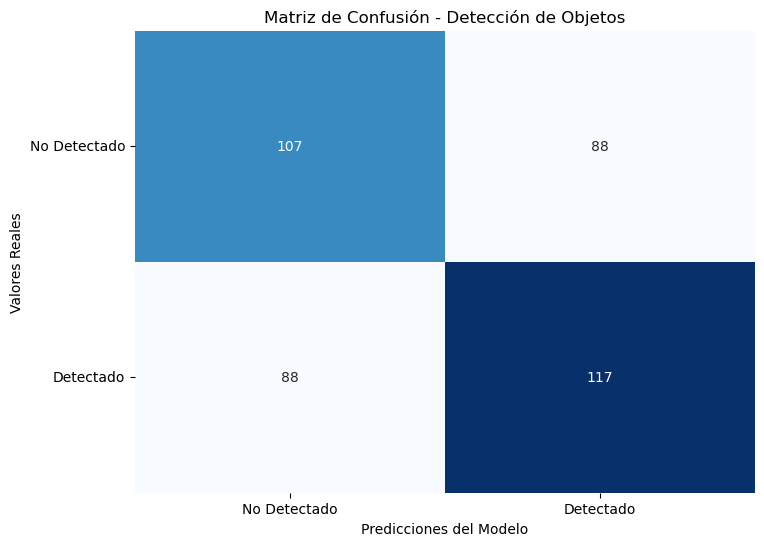

In [10]:
matriz_confusion = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))

class_names = ['No Detectado', 'Detectado']

sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
            xticklabels=class_names, yticklabels=class_names)

plt.title('Matriz de Confusión - Detección de Objetos')
plt.xlabel('Predicciones del Modelo')
plt.ylabel('Valores Reales')
plt.yticks(rotation=0)  
plt.show()


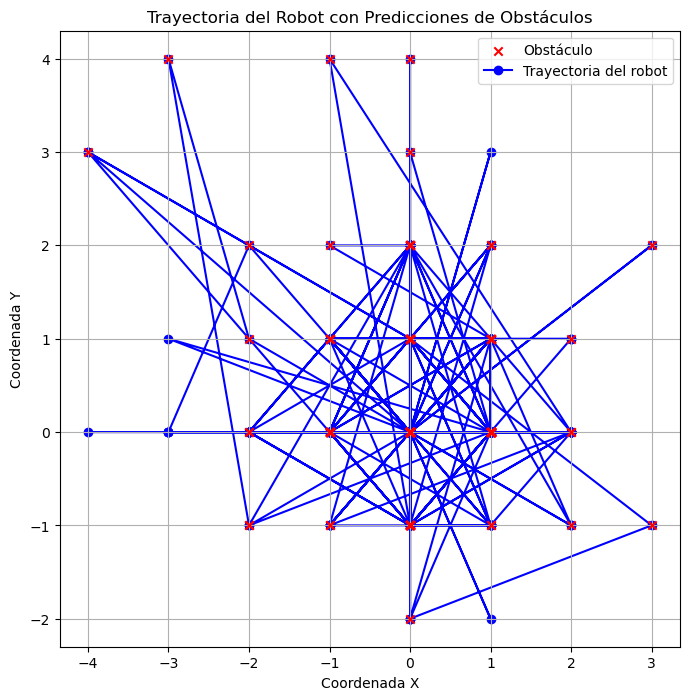

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(X_test.loc[y_pred == 1, 'x'], X_test.loc[y_pred == 1, 'y'], marker='x', label='Obstáculo', color='red', zorder=2)
plt.plot(X_test['x'], X_test['y'], marker='o', label='Trayectoria del robot', color='blue', zorder=1)

plt.title('Trayectoria del Robot con Predicciones de Obstáculos')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()